In [3]:
import urllib.request
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

'0.11.1'

In [32]:
df = pd.read_csv('out.csv')
df['user_scores'] = df['user_scores'] * 10
# Посчитаем корреляцию оценок критиков и пользователей по годам
corr = []
saved_df = df.dropna()
df = df.dropna()
df = df.astype({'critic_scores': 'float', 'dates': 'str', 'platforms': 'str'})
years = range(2005, 2022) 
for year in years:
    year_df = df.loc[(df['dates'].str.contains(str(year)))]
    corr.append(year_df['critic_scores'].corr(year_df['user_scores']))

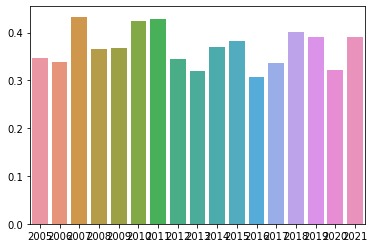

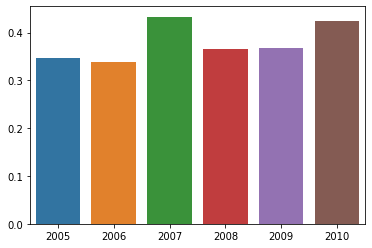

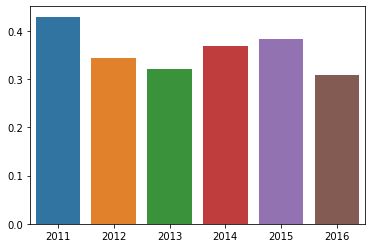

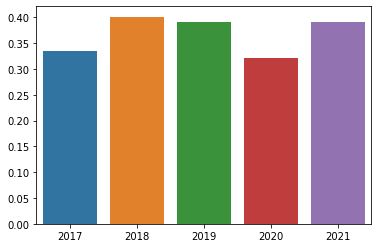

In [33]:
sns.barplot(x=list(years), y=corr)
plt.show()
partition = 6
for i in range((len(list(years)) + partition - 1) // partition):
    sns.barplot(x=list(years)[partition * i:partition * (i + 1)], y=corr[partition * i:partition * (i + 1)])
    plt.show()

In [34]:
# сделаем лист со всеми платформами и посмотрим на корреляцию оценок для всех платформ
platform_diff = []
platform_list = list(set(df['platforms']))
platform_list.remove('Stadia') # платформа с одной игрой
platform_corr = []
for elem in platform_list:
    platform_df = df.loc[(df.platforms == elem)]
    tmp_df = platform_df.mean(numeric_only=True)
    platform_diff.append(tmp_df['critic_scores'] - tmp_df['user_scores'])
    platform_corr.append(platform_df['critic_scores'].corr(platform_df['user_scores']))

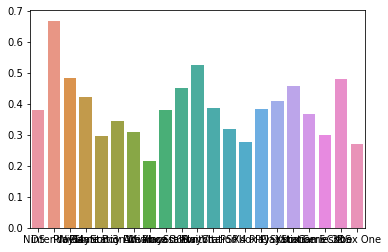

correlation


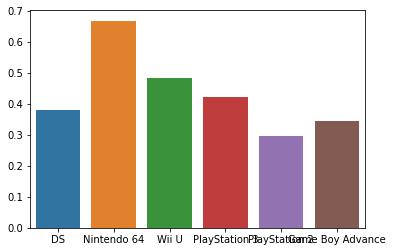

diff in scores


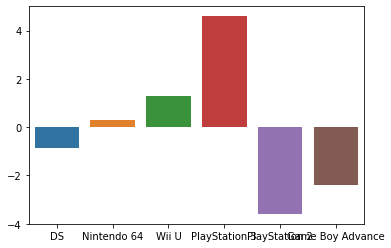

correlation


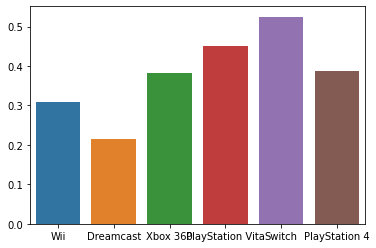

diff in scores


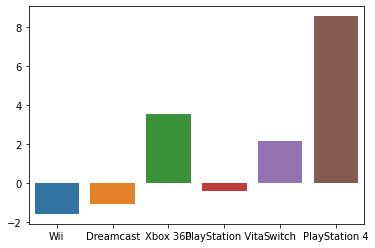

correlation


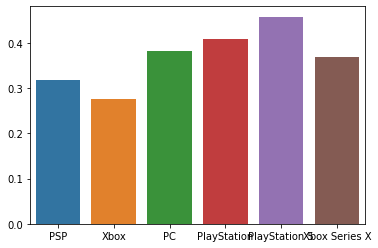

diff in scores


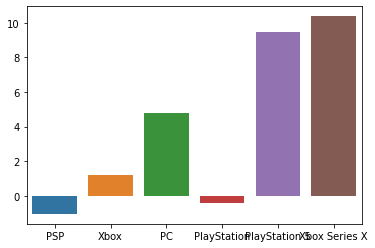

correlation


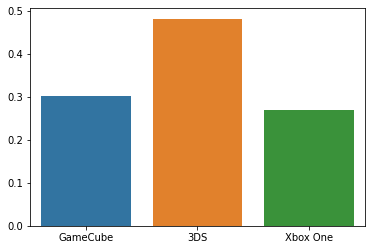

diff in scores


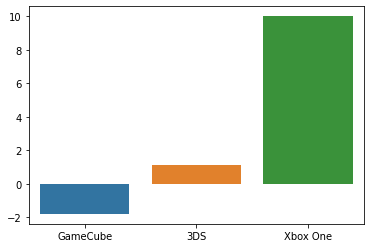

In [36]:
sns.barplot(x=platform_list, y=platform_corr)
plt.show()
partition = 6
for i in range((len(platform_corr) + partition - 1) // partition):
    sns.barplot(x=platform_list[partition * i:partition * (i + 1)], y=platform_corr[partition * i:partition * (i + 1)])
    print('correlation')
    plt.show()
    sns.barplot(x=platform_list[partition * i:partition * (i + 1)], y=platform_diff[partition * i:partition * (i + 1)])
    print('diff in scores')
    plt.show()

DS


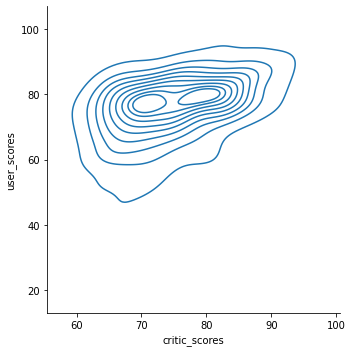

Nintendo 64


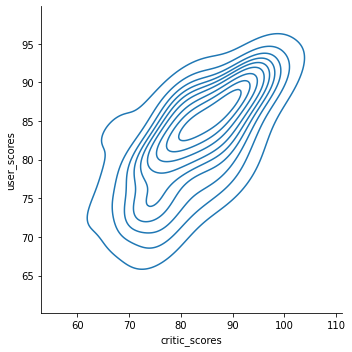

Wii U


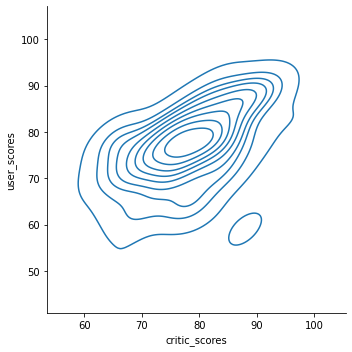

PlayStation 3


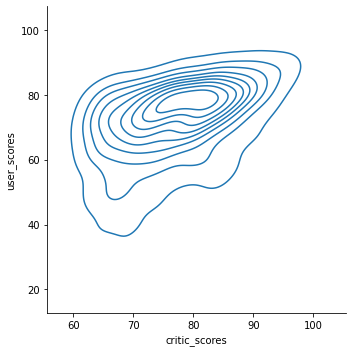

PlayStation 2


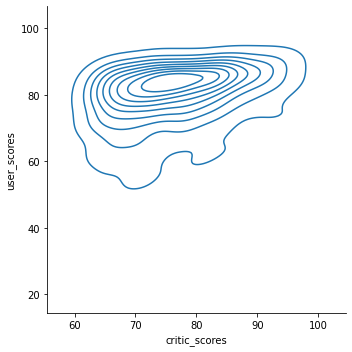

Game Boy Advance


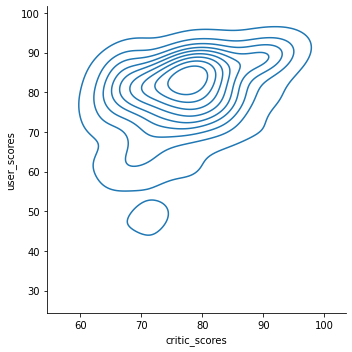

Wii


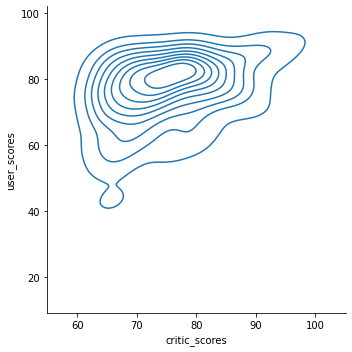

Dreamcast


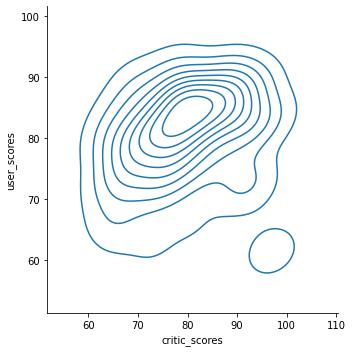

Xbox 360


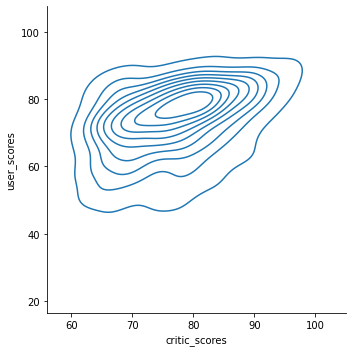

PlayStation Vita


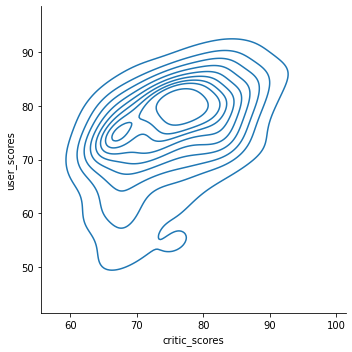

Switch


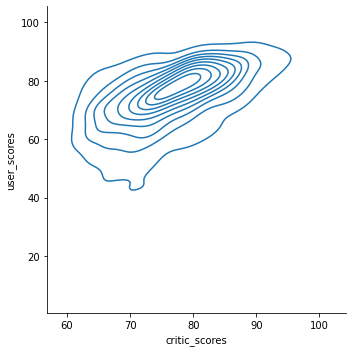

PlayStation 4


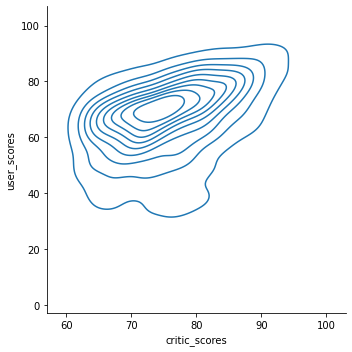

PSP


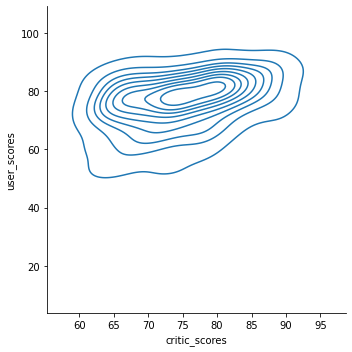

Xbox


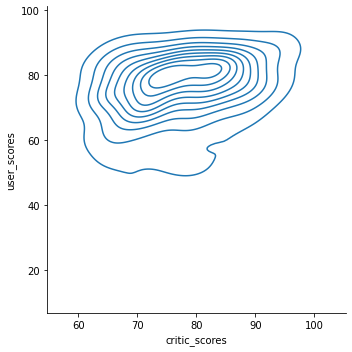

PC


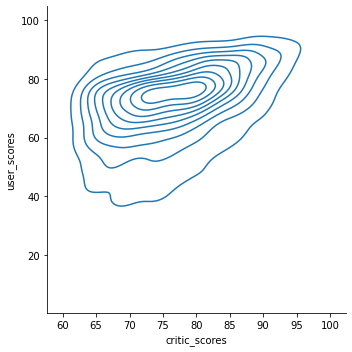

PlayStation


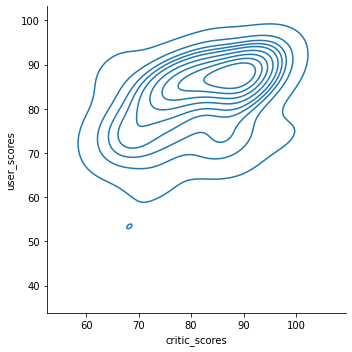

PlayStation 5


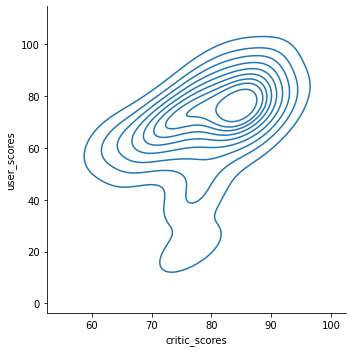

Xbox Series X


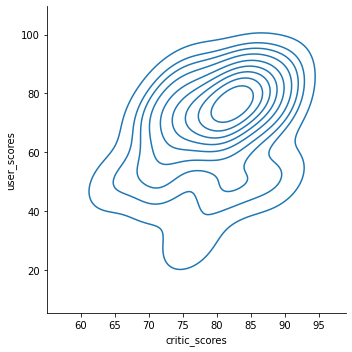

GameCube


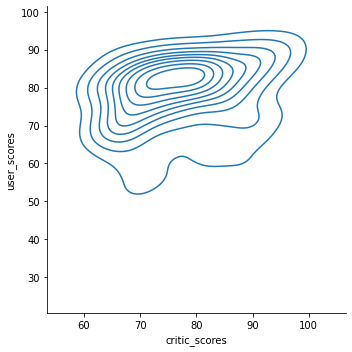

3DS


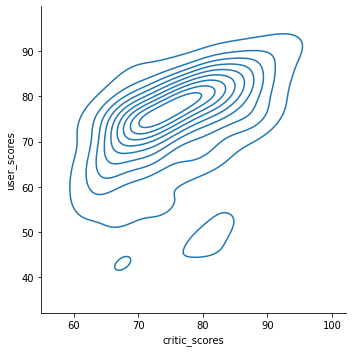

Xbox One


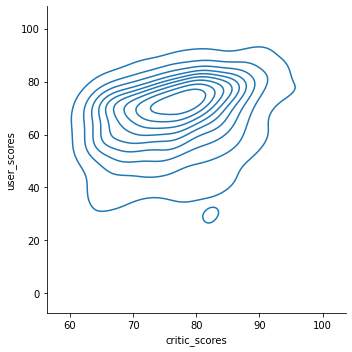

In [37]:
# РАБОТАЕТ ТОЛЬКО С SEABORN > 0.11.0 и не сразу
for elem in platform_list:
    print(elem)
    platform_df = df.loc[(df.platforms == elem)]
    sns.displot(platform_df, x="critic_scores", y="user_scores", kind='kde')
    plt.show()